In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [89]:
data=pd.read_csv('/content/10000 Sales Records.csv')

In [90]:
df=pd.DataFrame(data)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [92]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [93]:
df.shape

(10000, 14)

In [94]:
df.describe()

Order ID    Units Sold    Unit Price     Unit Cost  Total Revenue  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   1.000000e+04   
mean   5.498719e+08   5002.855900    268.143139    188.806639   1.333355e+06   
std    2.607835e+08   2873.246454    217.944092    176.445907   1.465026e+06   
min    1.000892e+08      2.000000      9.330000      6.920000   1.679400e+02   
25%    3.218067e+08   2530.750000    109.280000     56.670000   2.885511e+05   
50%    5.485663e+08   4962.000000    205.700000    117.110000   8.000512e+05   
75%    7.759981e+08   7472.000000    437.200000    364.690000   1.819143e+06   
max    9.999342e+08  10000.000000    668.270000    524.960000   6.680027e+06   

         Total Cost  Total Profit  
count  1.000000e+04  1.000000e+04  
mean   9.382658e+05  3.950893e+05  
std    1.145914e+06  3.775550e+05  
min    1.245600e+02  4.338000e+01  
25%    1.647855e+05  9.832914e+04  
50%    4.816058e+05  2.890990e+05  
75%    1.183822e+06  5.664227e+05  
max    5.241726e+06  1.738178e+06

In [ ]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [86]:
df=df.fillna(5)

In [45]:
import pandas as pd
df = pd.read_csv('/content/10000 Sales Records.csv')
df = df.fillna(5)

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
y=df['Total Profit']

In [48]:
x=df.drop('Total Profit',axis=1)

In [49]:
x.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost'],
      dtype='object')

In [50]:
y

0        566105.00
1         16834.50
2        411291.95
3       1273303.59
4         54669.06
           ...    
9995     134629.02
9996      97714.94
9997     159340.12
9998     497983.20
9999      19905.54
Name: Total Profit, Length: 10000, dtype: float64

In [51]:
oh = OneHotEncoder(sparse_output=False)
diet_reshaped = df['Region'].values.reshape(-1, 1)
encoded_diet = oh.fit_transform(diet_reshaped)
encoded_diet_df = pd.DataFrame(encoded_diet, columns=oh.categories_[0], dtype=int)
df = pd.concat([df, encoded_diet_df], axis=1)

In [53]:
encoded=oh.fit_transform(x[['Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date',
       'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost',
       'Total Revenue', 'Total Cost']]) # Removed 'Total Profit' from the list of columns
encoded_df=pd.DataFrame(encoded,columns=oh.get_feature_names_out())
encoded_df.columns

Index(['Country_Afghanistan', 'Country_Albania', 'Country_Algeria',
       'Country_Andorra', 'Country_Angola', 'Country_Antigua and Barbuda ',
       'Country_Armenia', 'Country_Australia', 'Country_Austria',
       'Country_Azerbaijan',
       ...
       'Total Cost_5207603.2', 'Total Cost_5210228.0', 'Total Cost_5221252.16',
       'Total Cost_5227551.68', 'Total Cost_5229126.56',
       'Total Cost_5232276.32', 'Total Cost_5233326.24',
       'Total Cost_5240675.68', 'Total Cost_5241200.64',
       'Total Cost_5241725.6'],
      dtype='object', length=41143)

In [54]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Asia',
       'Australia and Oceania', 'Central America and the Caribbean', 'Europe',
       'Middle East and North Africa', 'North America', 'Sub-Saharan Africa'],
      dtype='object')

In [55]:
num_column=df.select_dtypes(include='number').columns

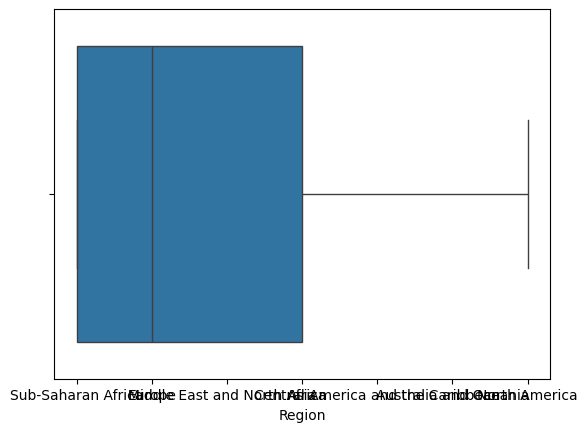

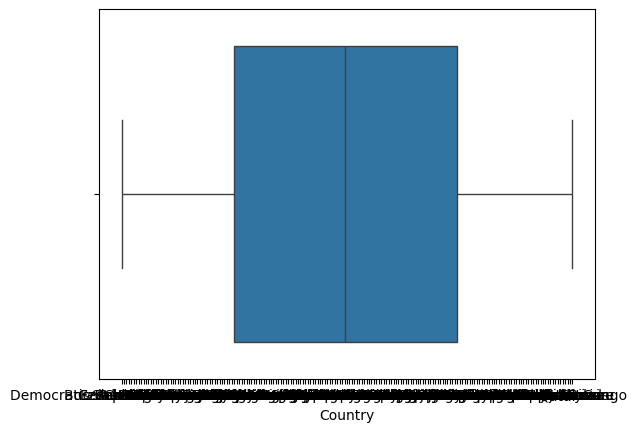

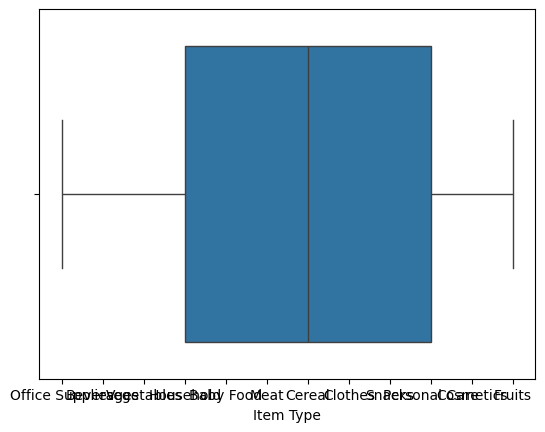

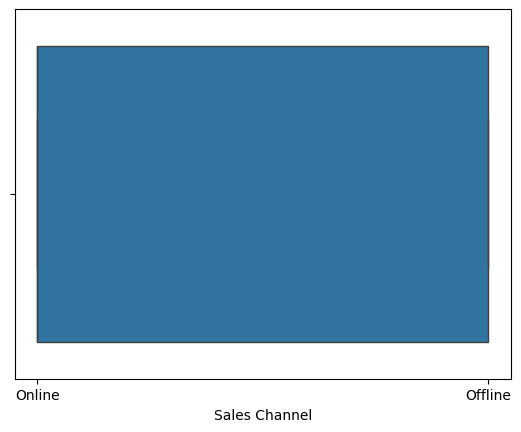

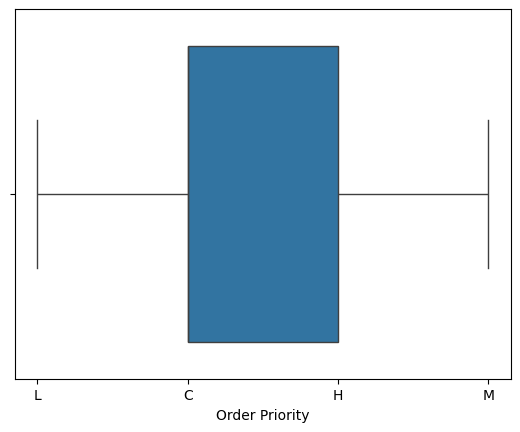

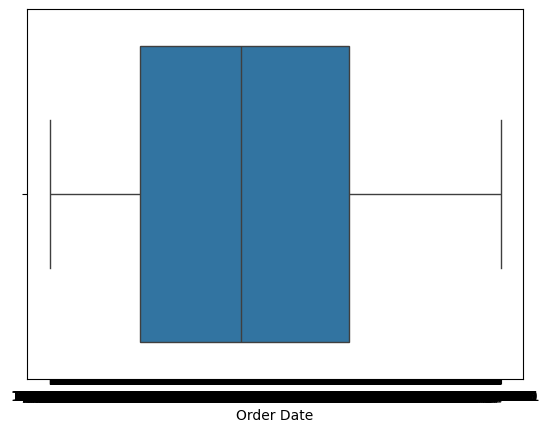

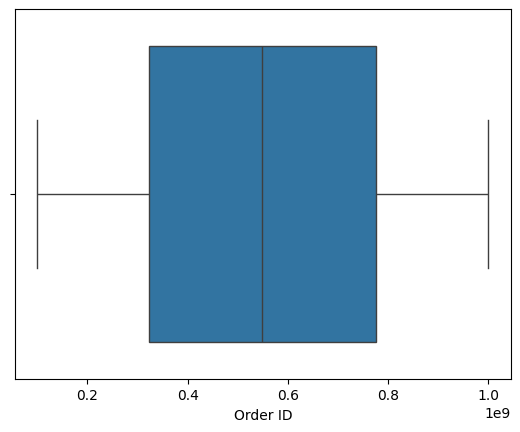

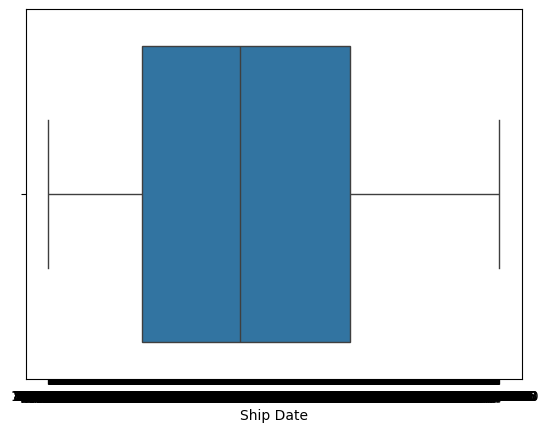

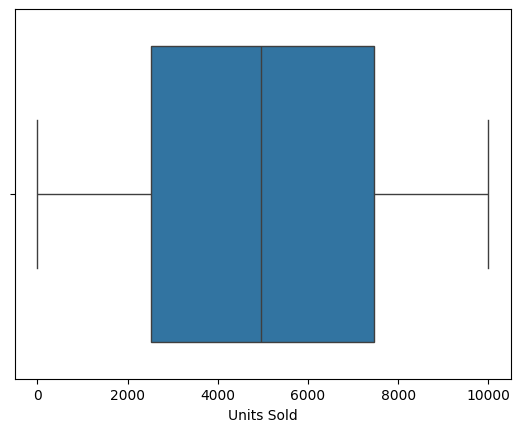

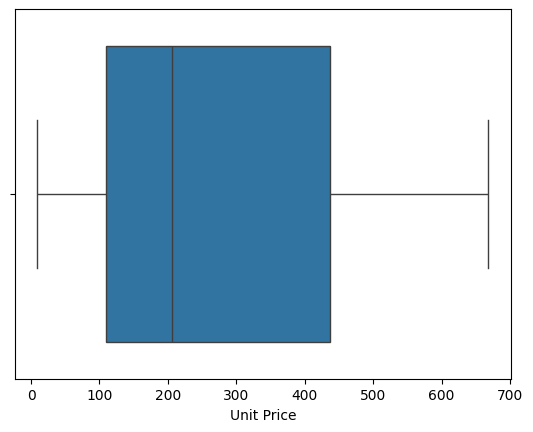

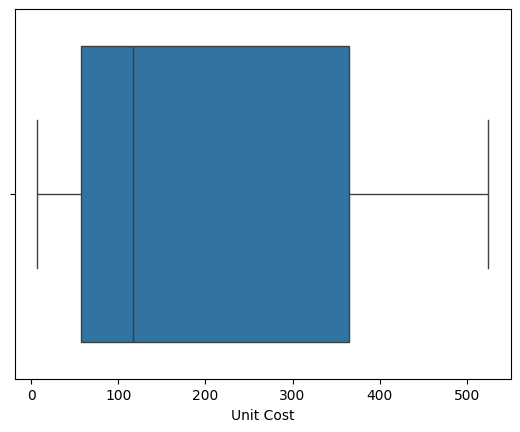

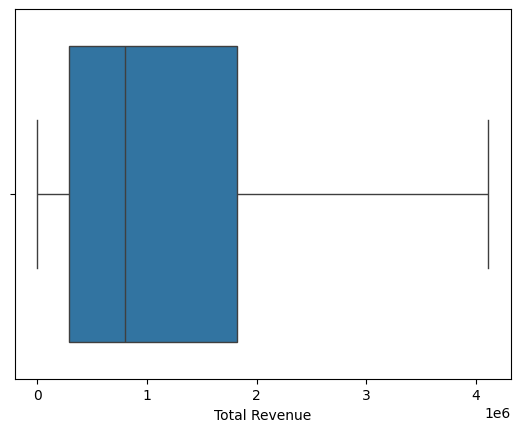

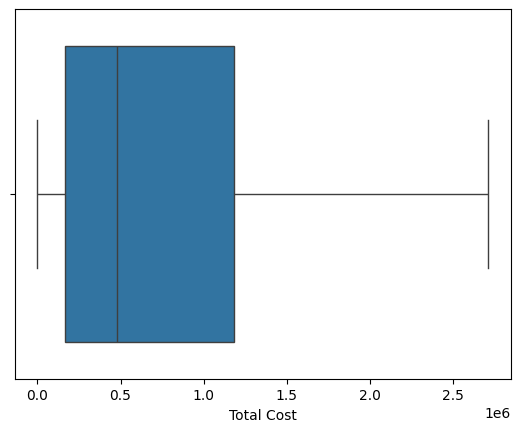

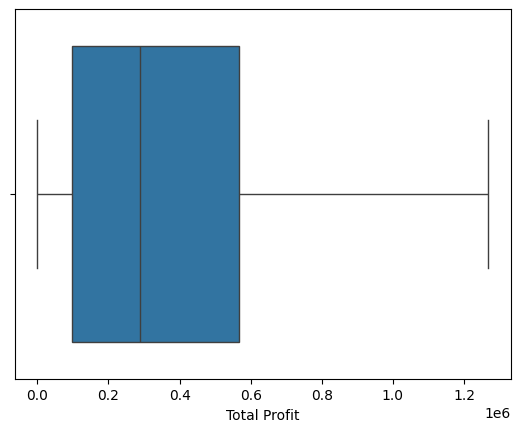

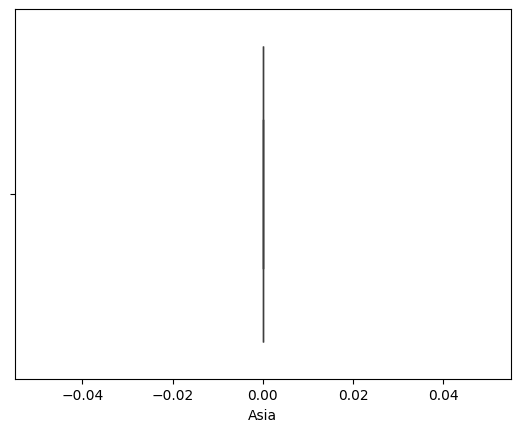

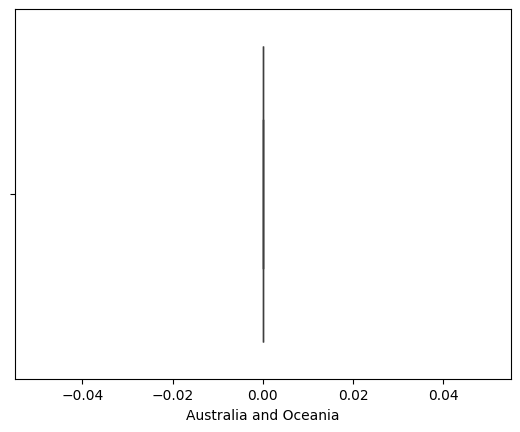

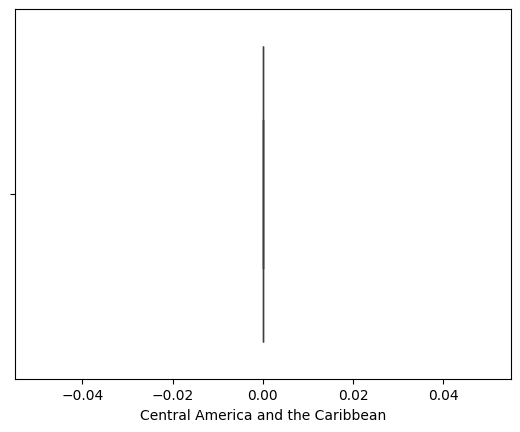

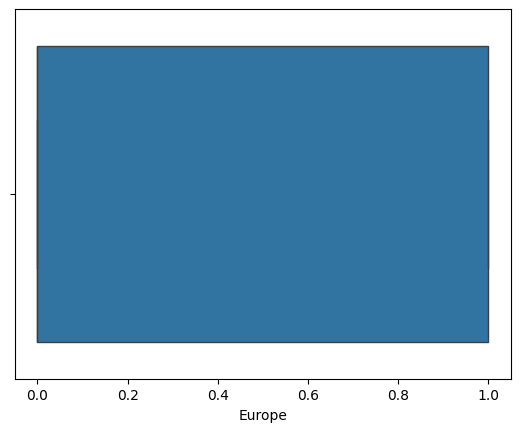

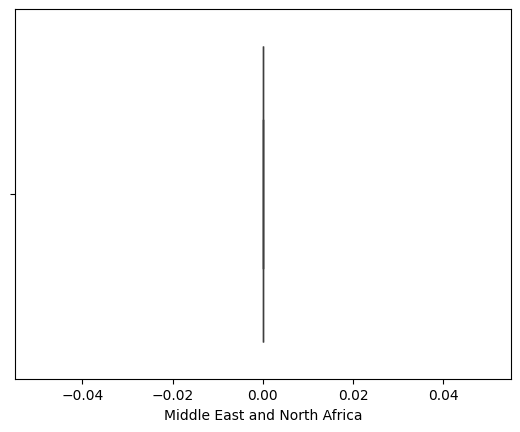

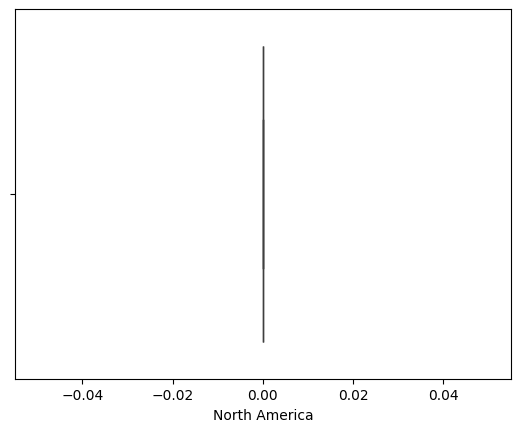

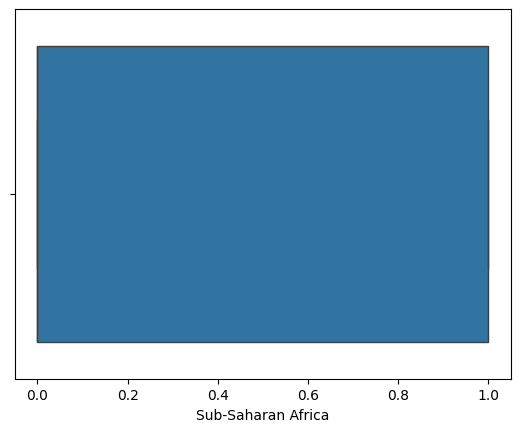

In [87]:
for column in df.columns:
    sns.boxplot(data=df, x=column)
    plt.show()

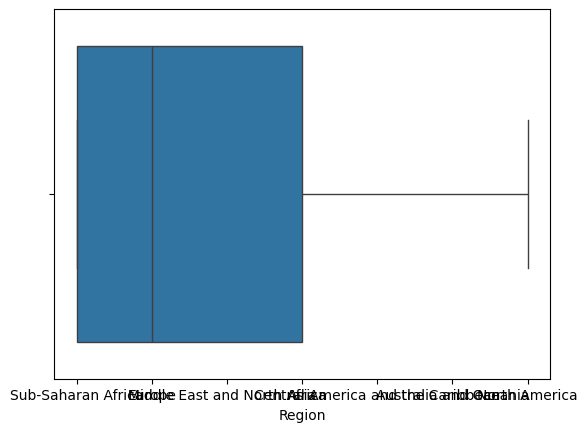

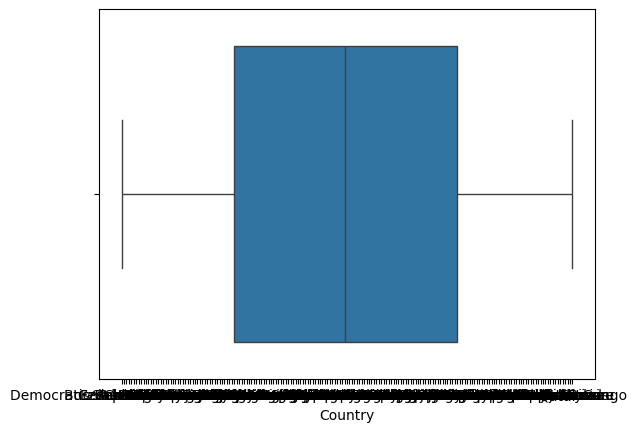

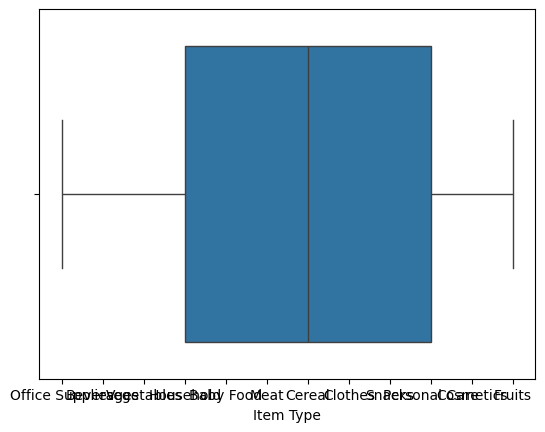

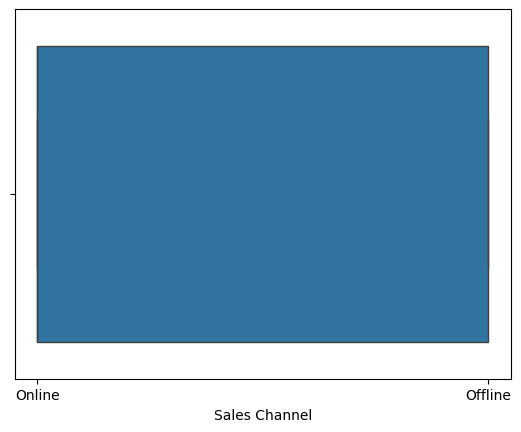

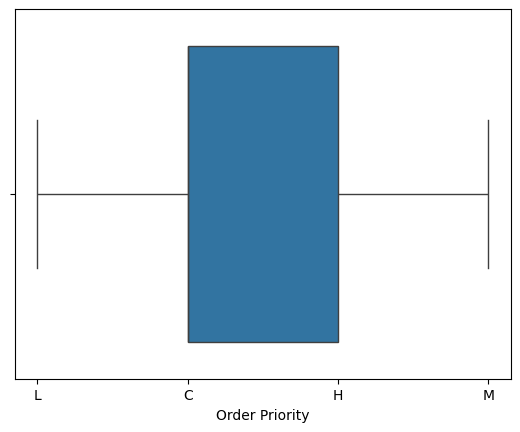

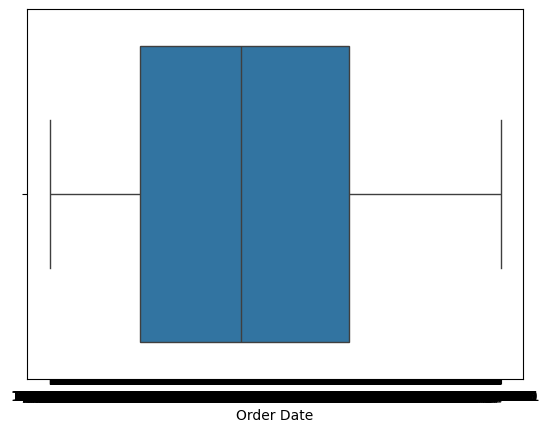

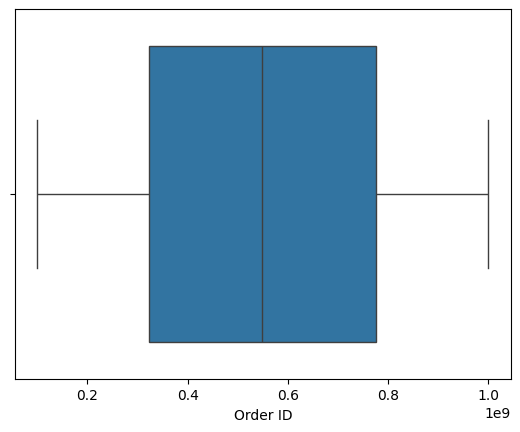

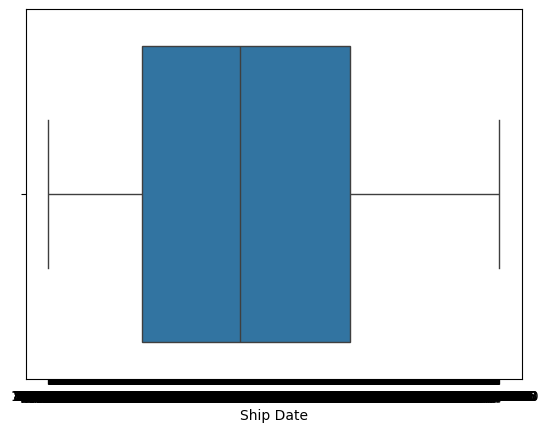

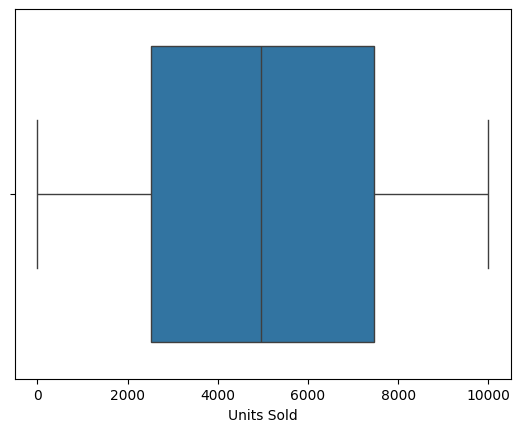

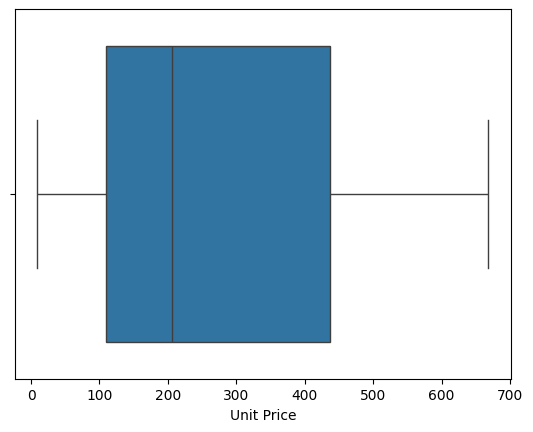

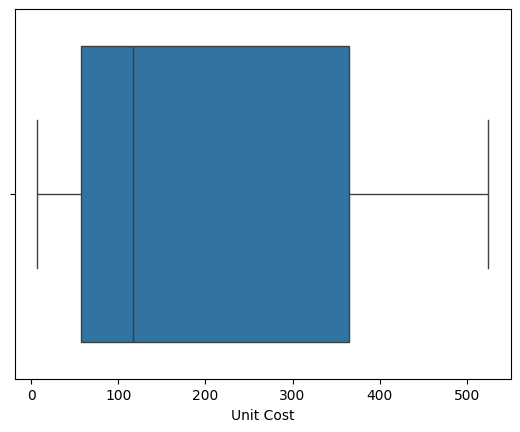

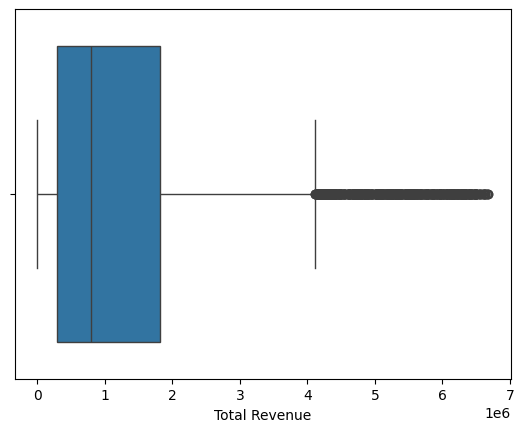

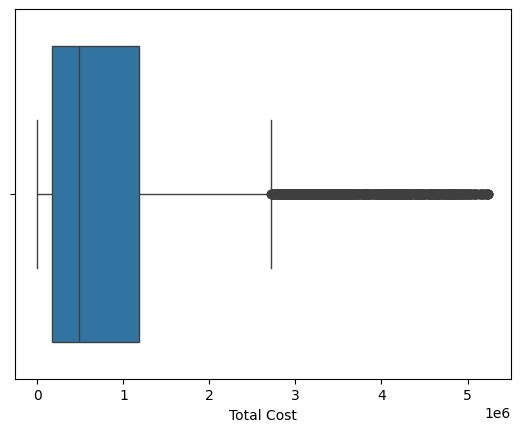

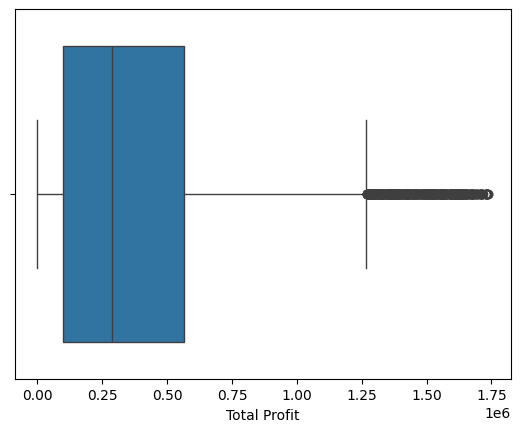

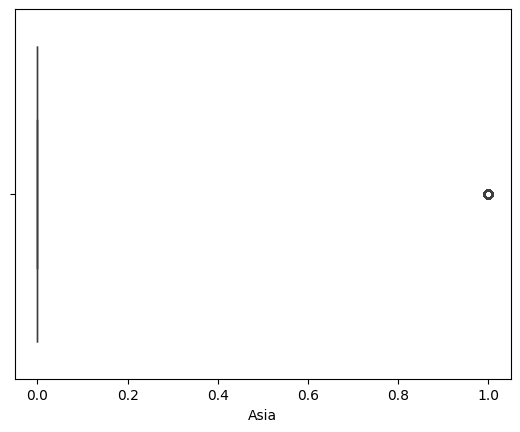

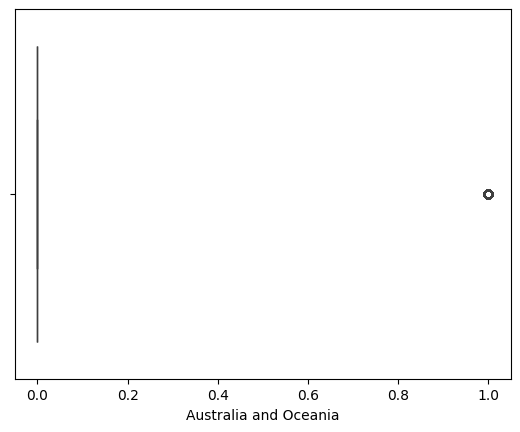

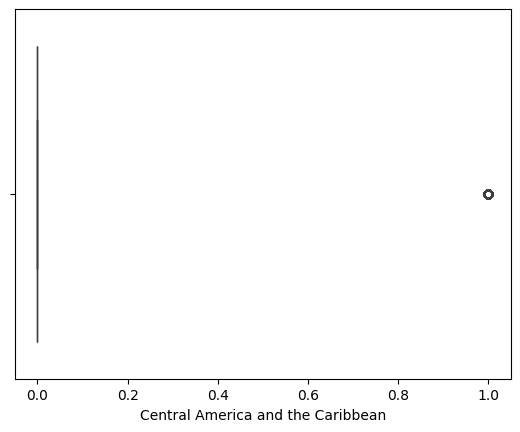

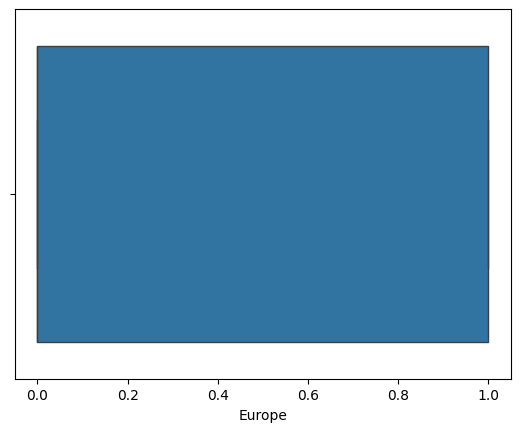

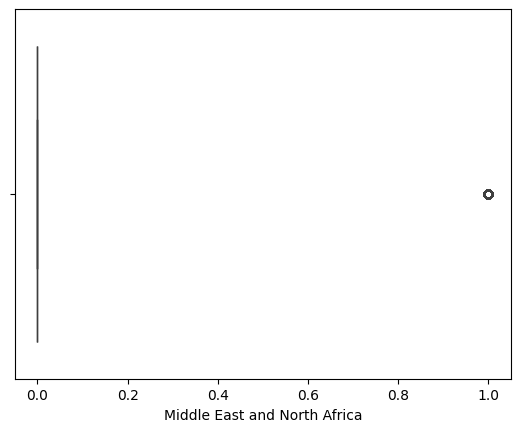

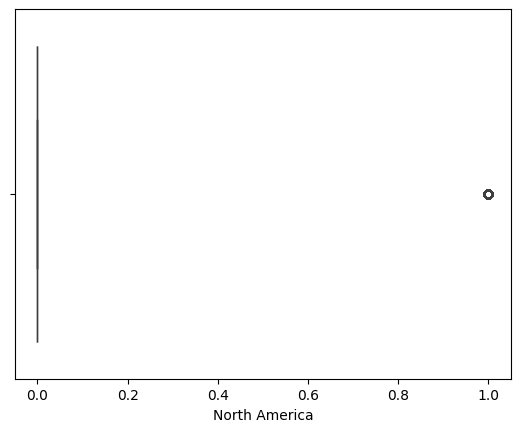

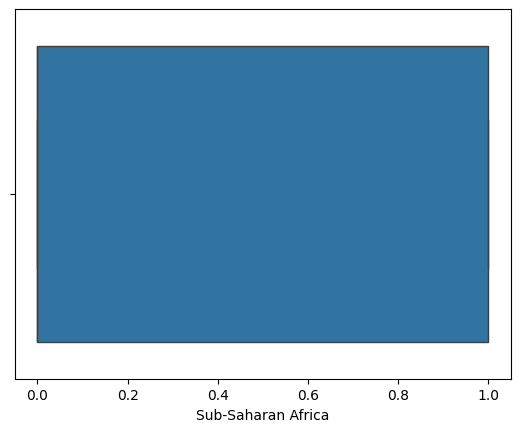

In [59]:
for column in df.columns:
    sns.boxplot(data=df, x=column)
    plt.show() # Now plt is defined and this should work

In [60]:
def handling_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        Lower_bound=q1-1.5*iqr
        Upper_bound=q3+1.5*iqr
        df[col]=df[col].apply(lambda x:Upper_bound if x>Upper_bound else x)
    return df

In [61]:
def handling_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        Lower_bound=q1-1.5*iqr
        Upper_bound=q3+1.5*iqr
        df[col] = np.where(df[col] > Upper_bound, Upper_bound, df[col])
    return df

In [62]:
df1=handling_outliers(df)
df1.head()
plt.show()

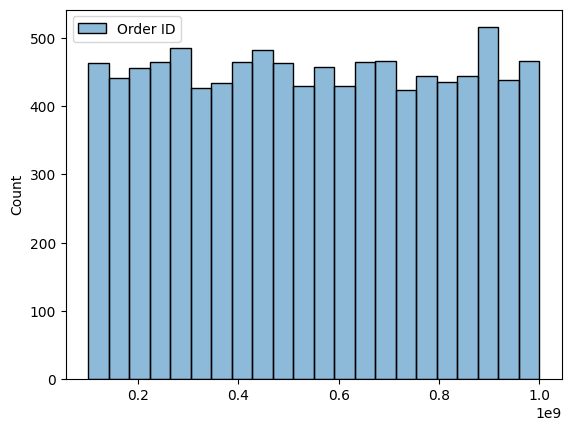

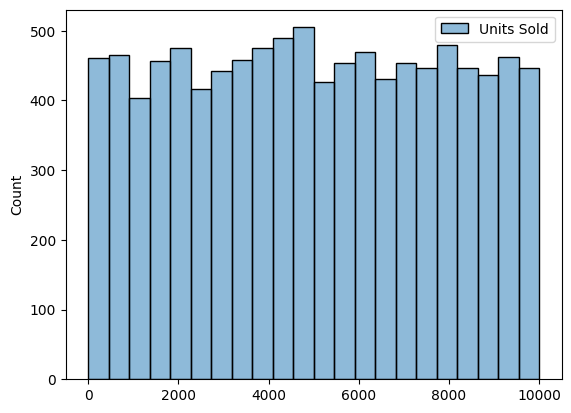

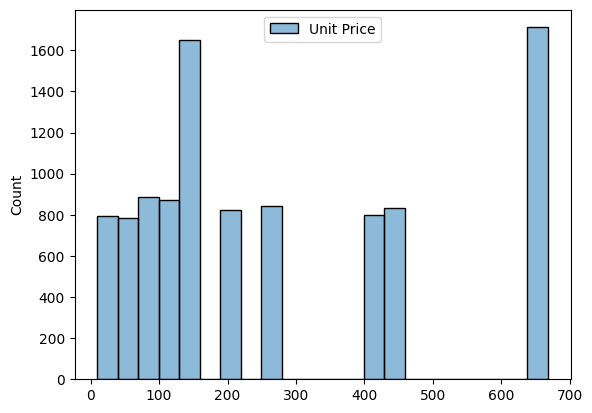

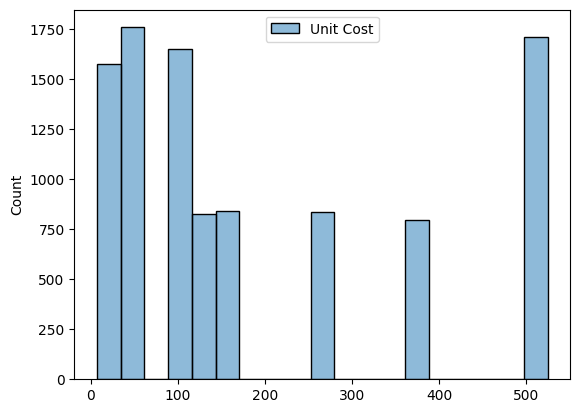

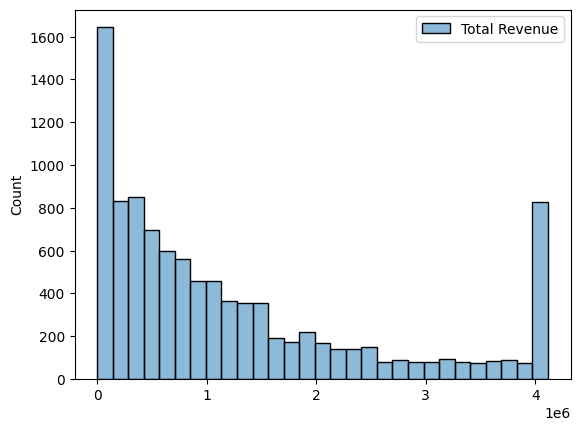

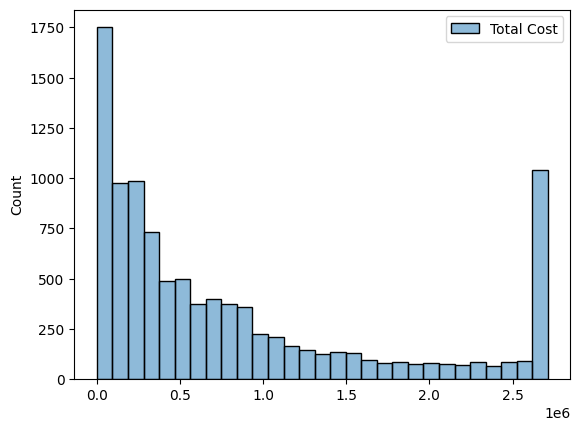

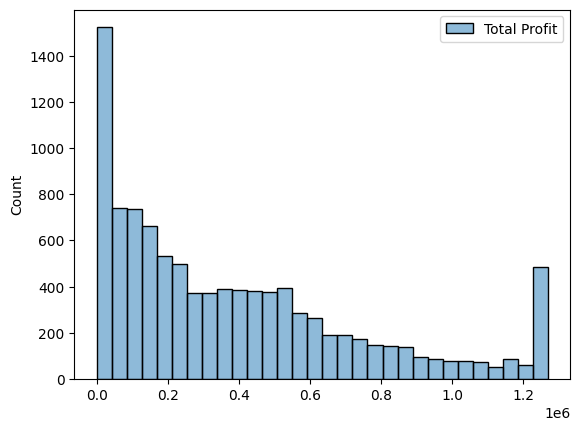

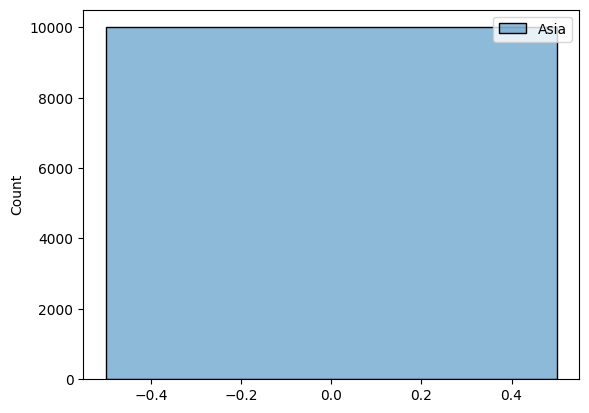

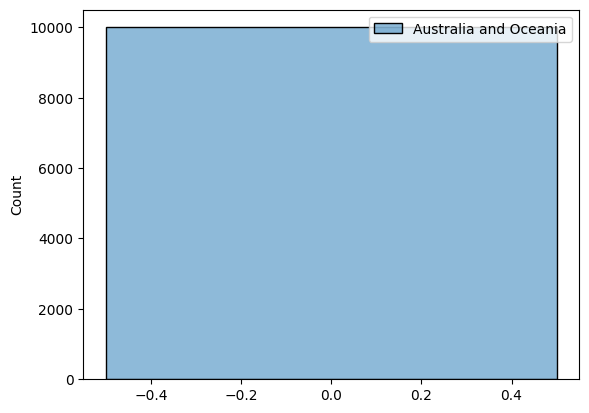

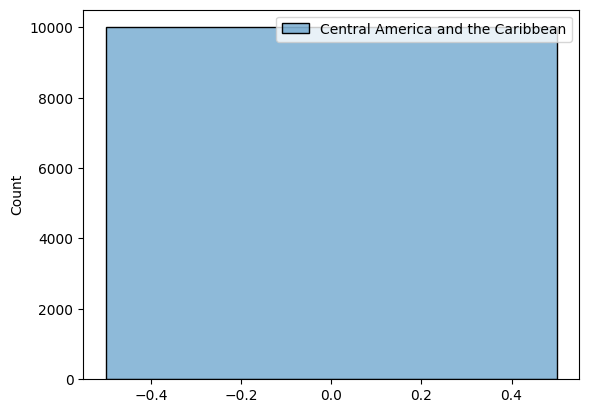

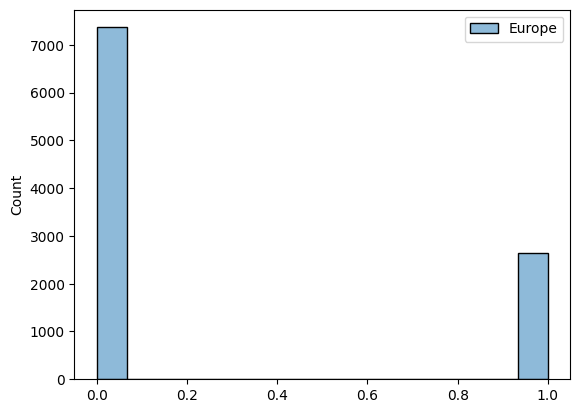

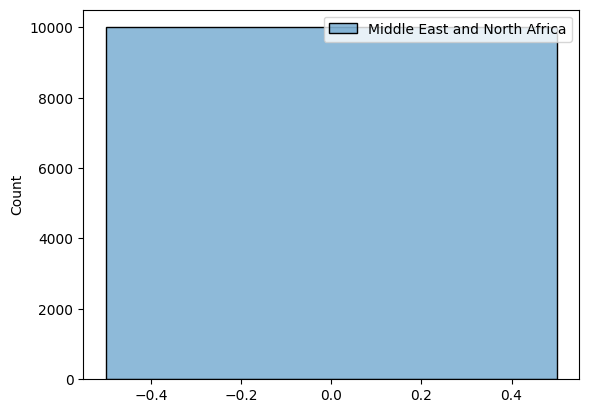

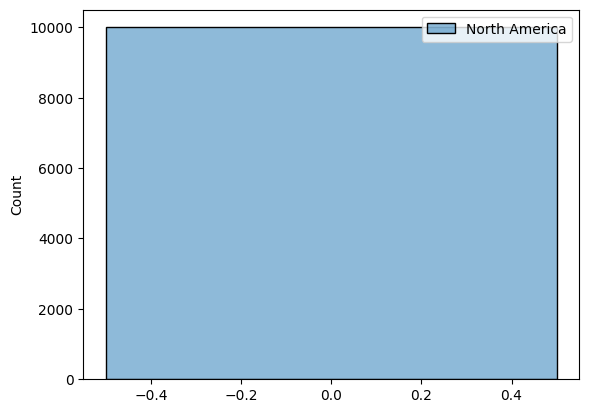

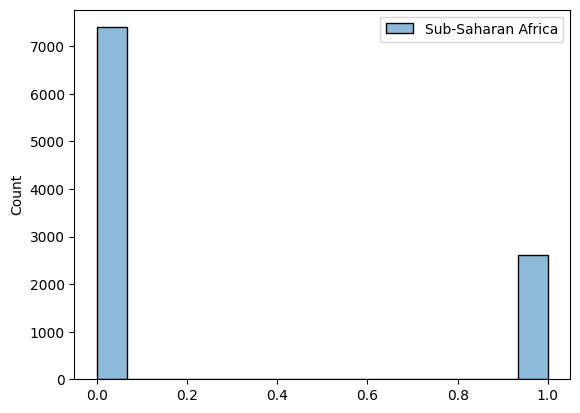

In [63]:
for column in num_column:
  sns.histplot(data=df[[column]])
  plt.show()

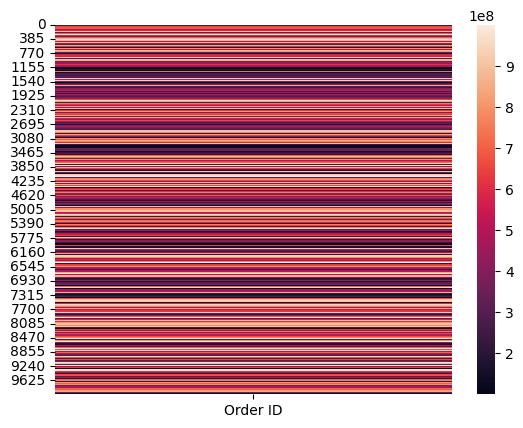

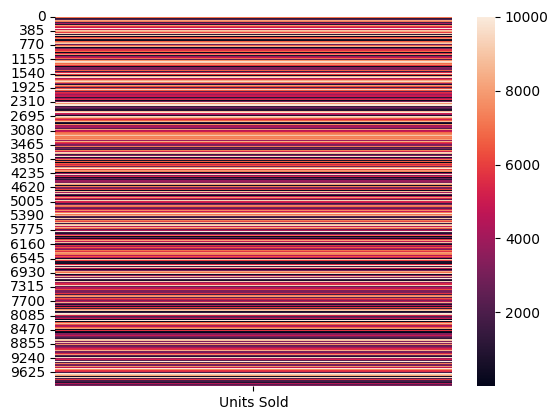

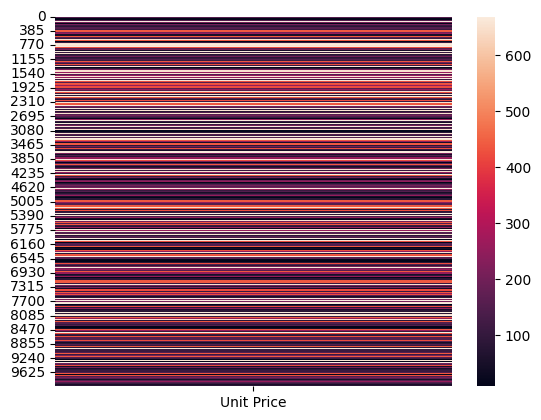

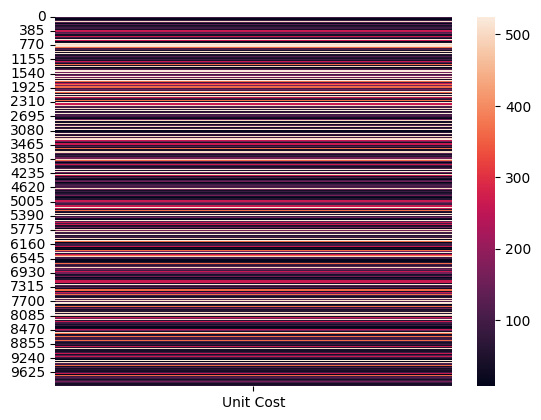

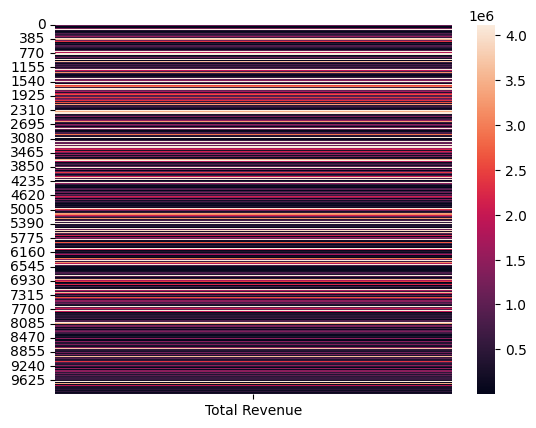

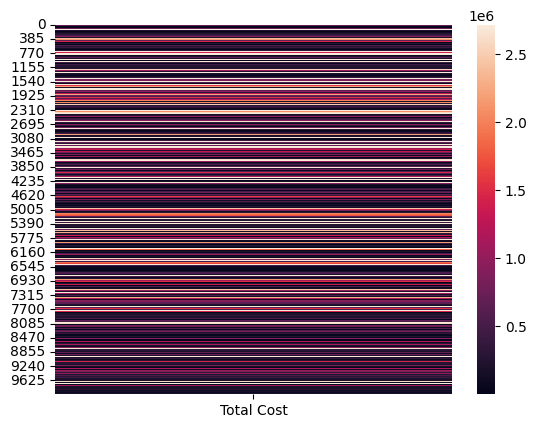

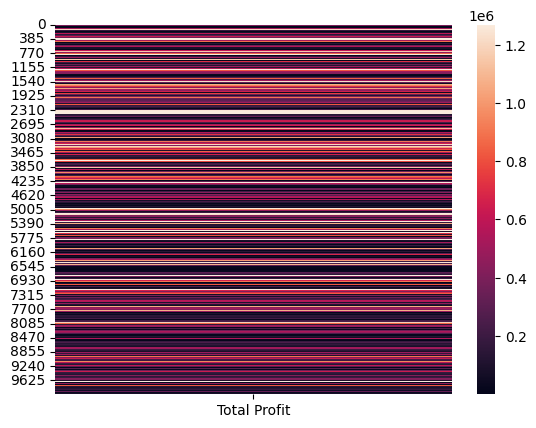

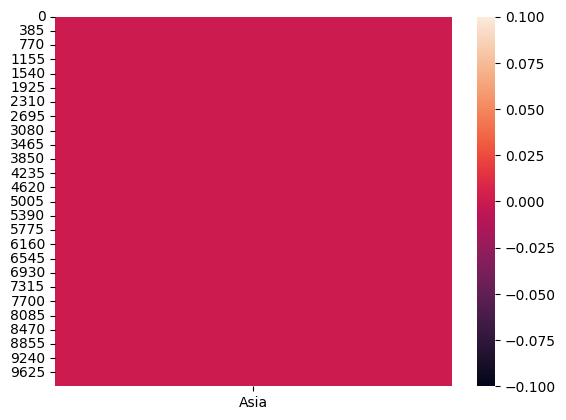

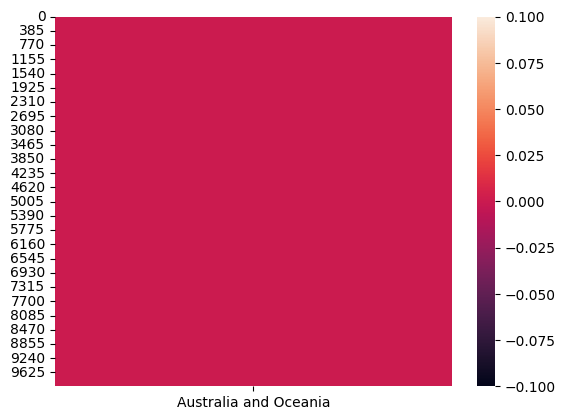

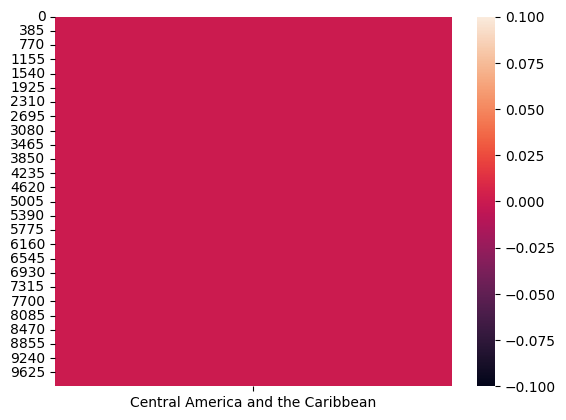

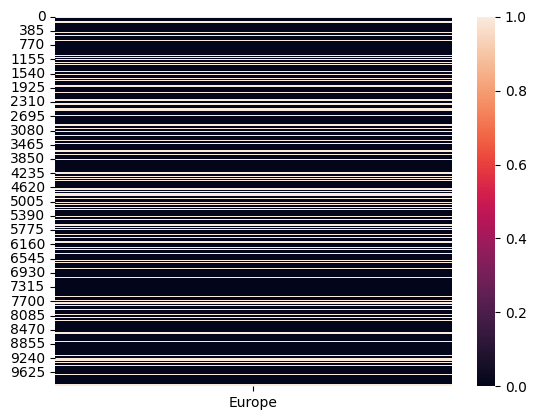

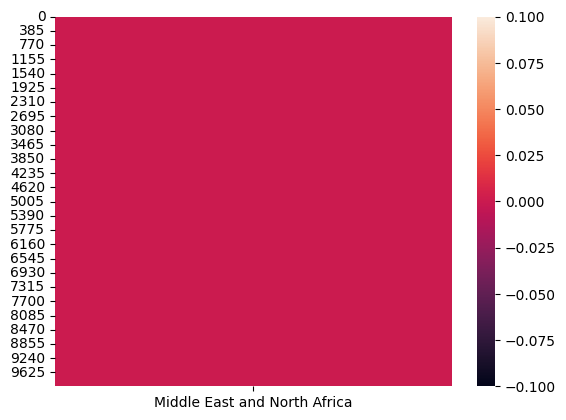

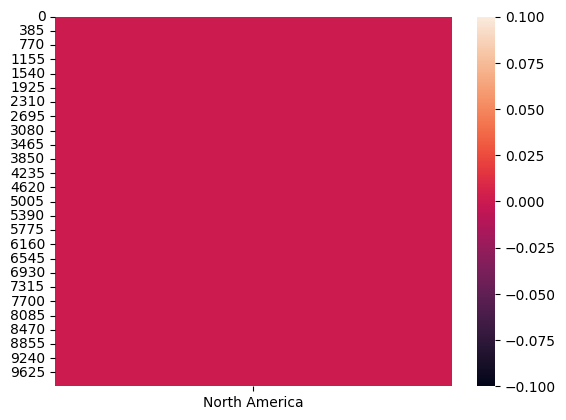

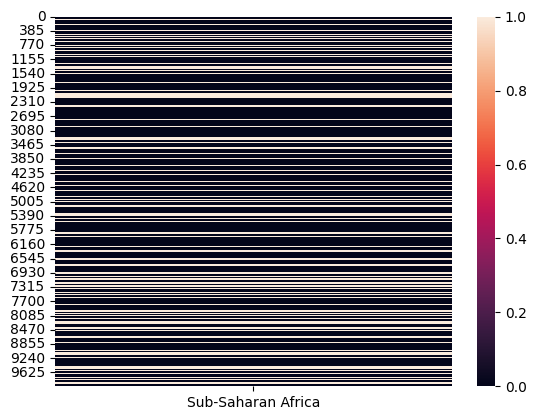

In [64]:
for column in num_column:
  sns.heatmap(data=df[[column]])
  plt.show()

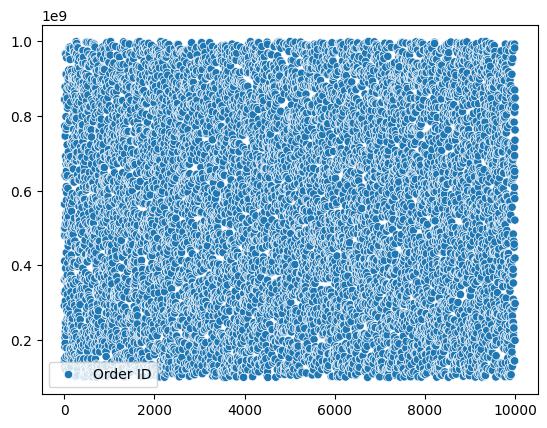

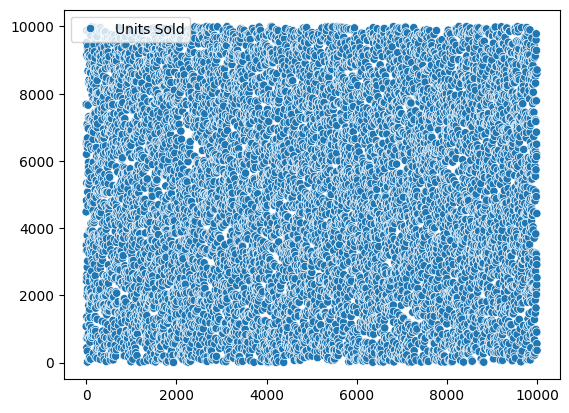

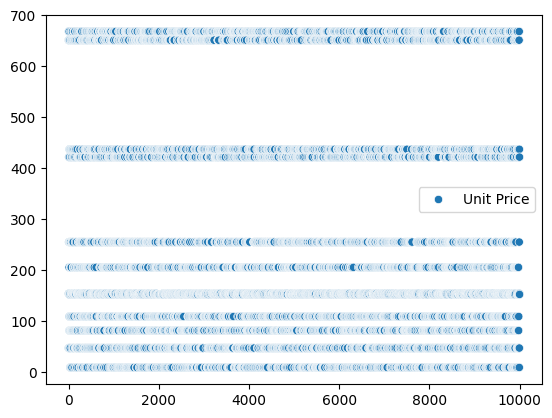

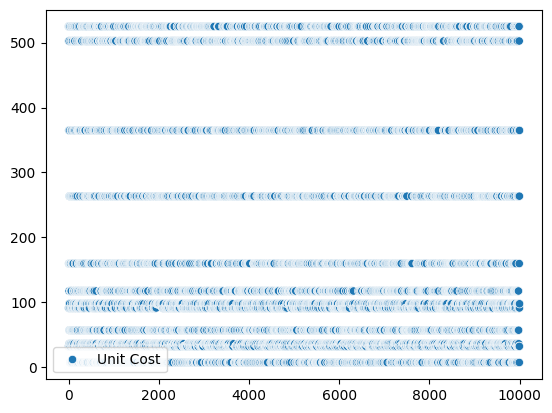

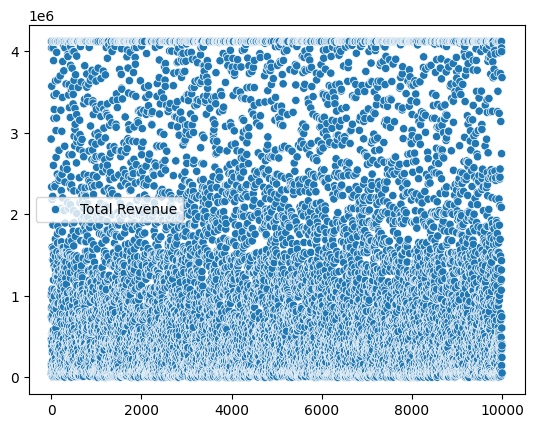

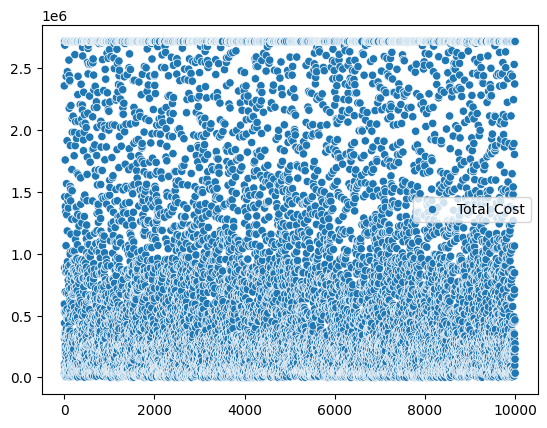

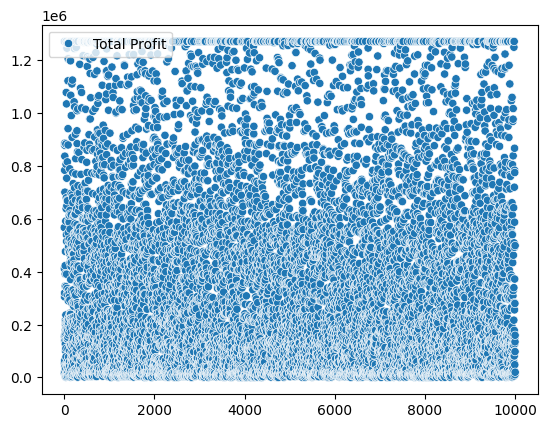

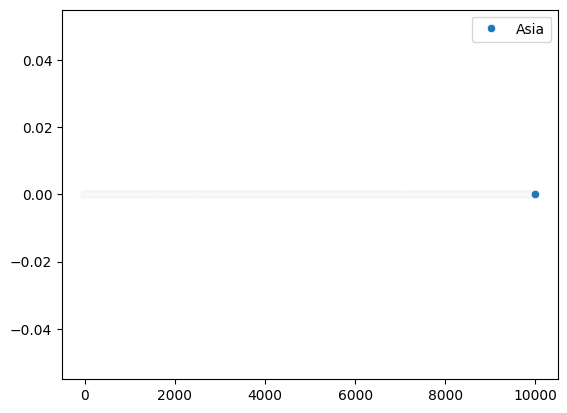

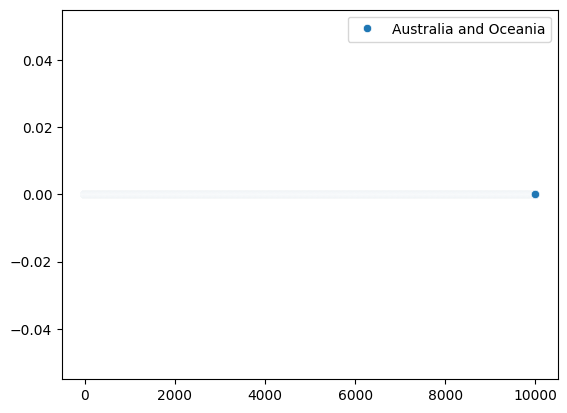

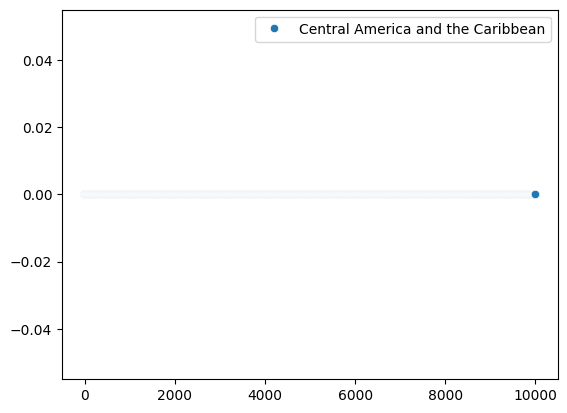

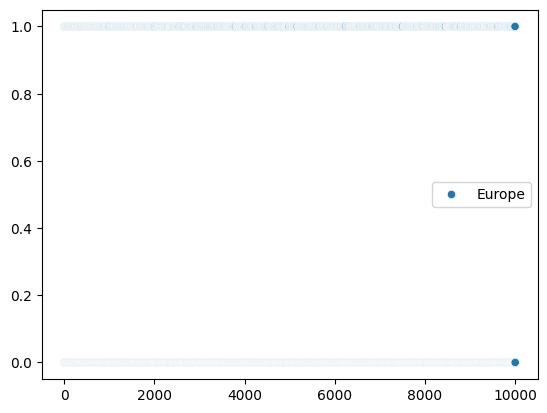

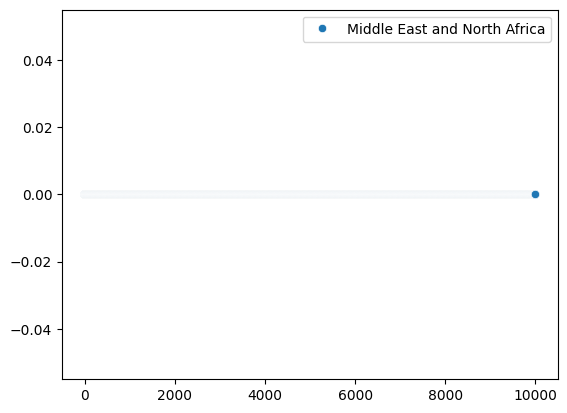

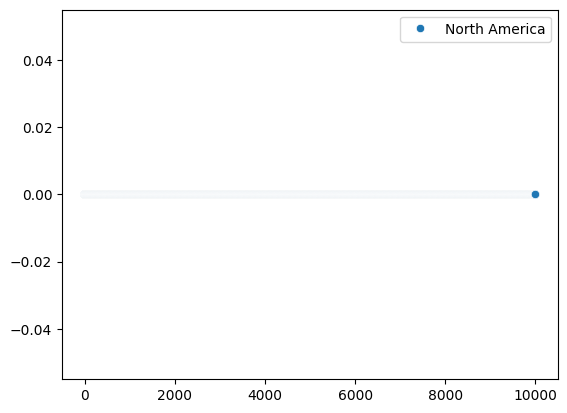

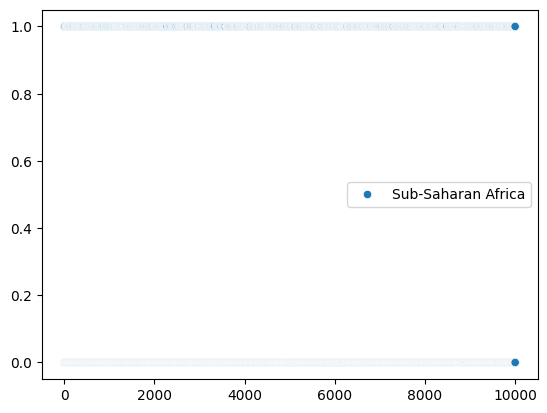

In [65]:
for column in num_column:
  sns.scatterplot(data=df[[column]])
  plt.show()

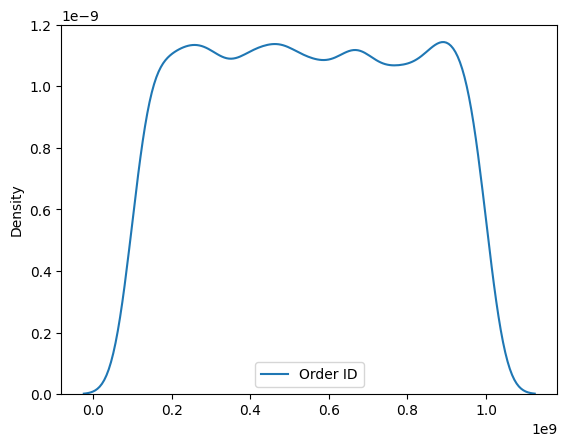

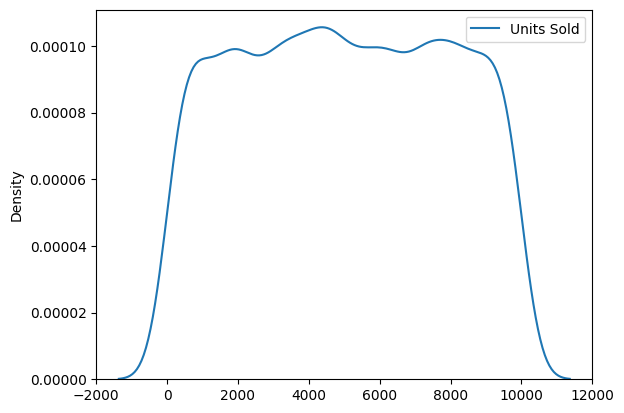

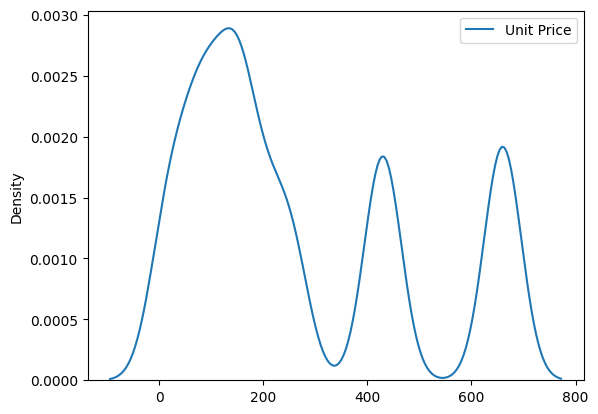

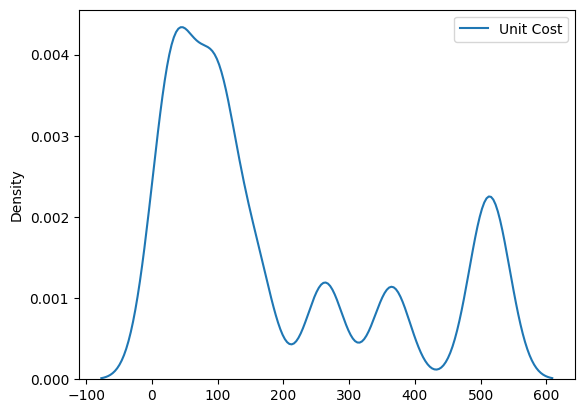

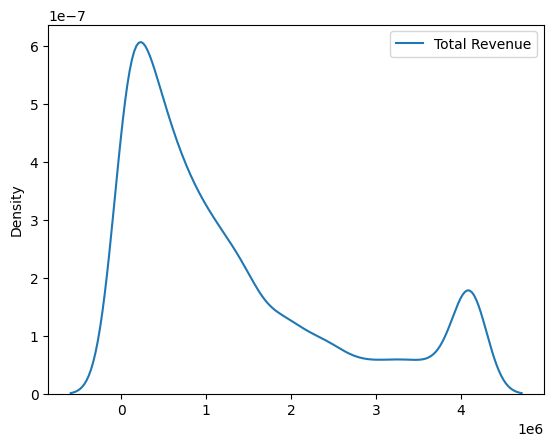

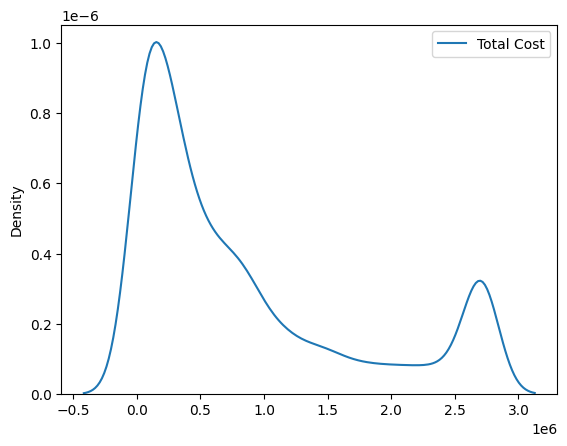

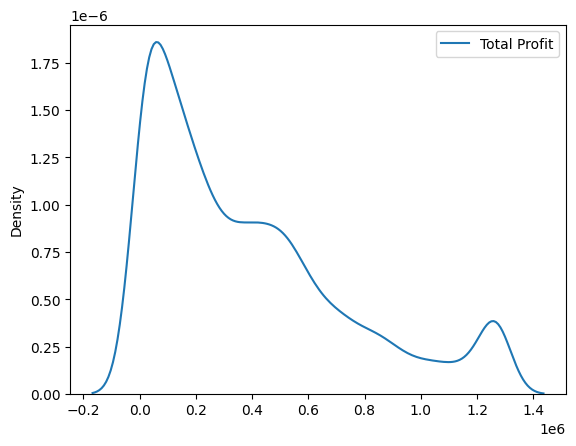

<ipython-input-66-c20e2337c087>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[[column]])


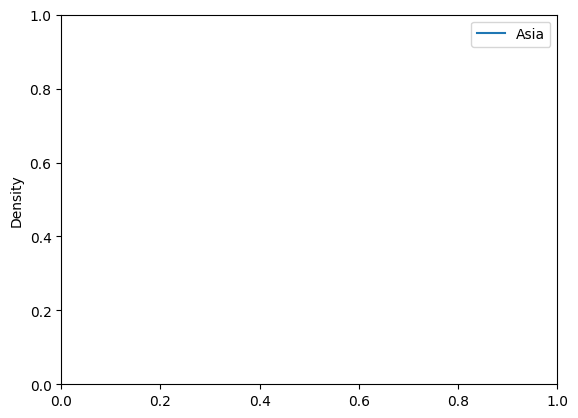

<ipython-input-66-c20e2337c087>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[[column]])


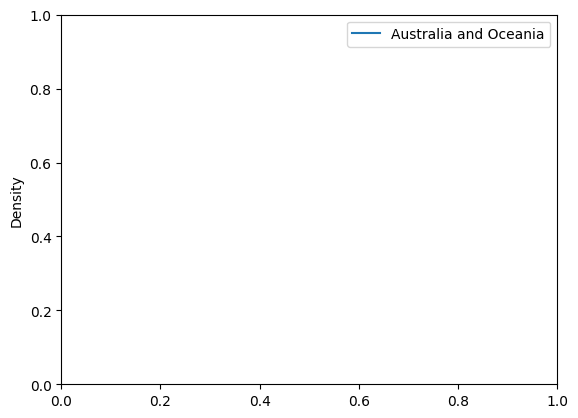

<ipython-input-66-c20e2337c087>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[[column]])


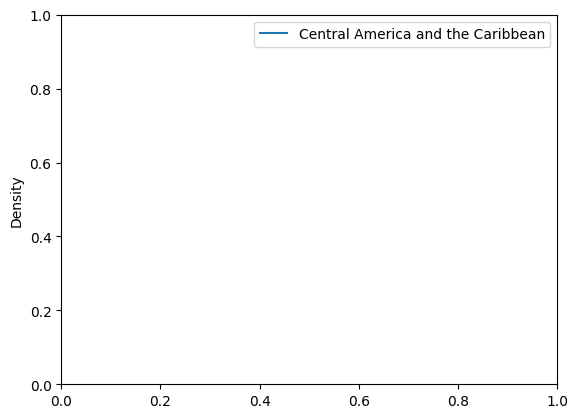

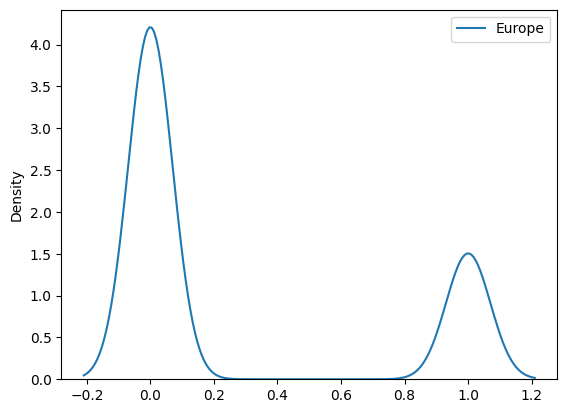

<ipython-input-66-c20e2337c087>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[[column]])


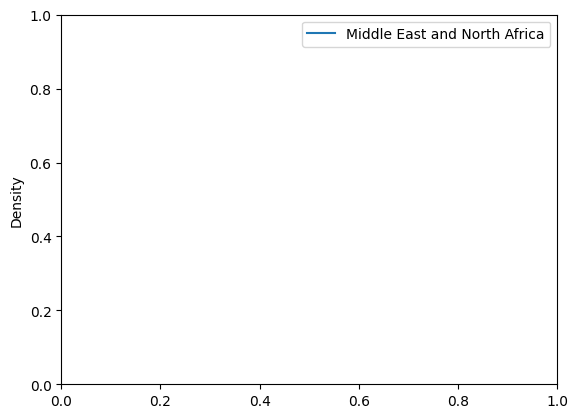

<ipython-input-66-c20e2337c087>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[[column]])


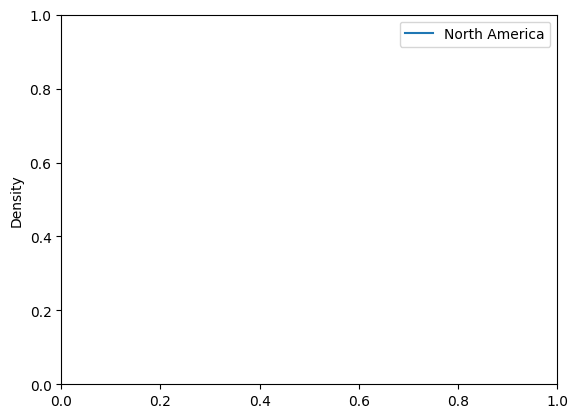

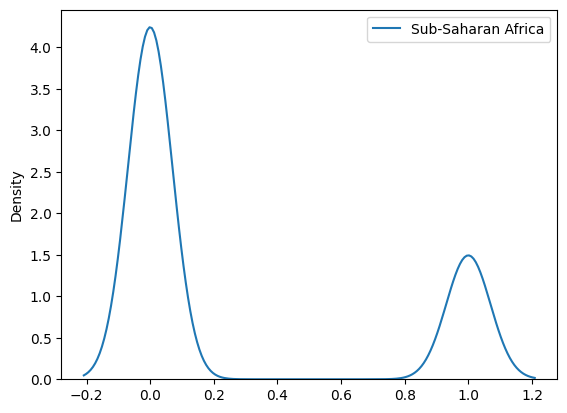

In [66]:
for column in num_column:
  sns.kdeplot(data=df[[column]])
  plt.show()

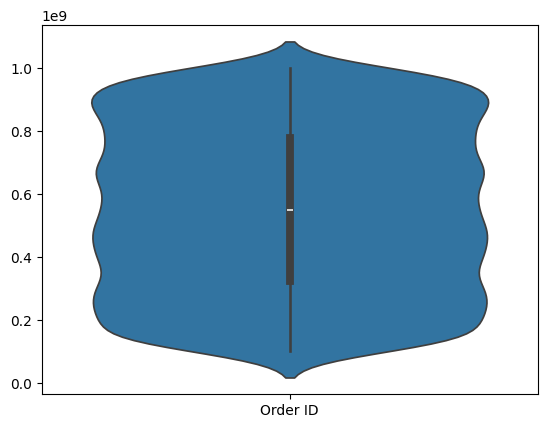

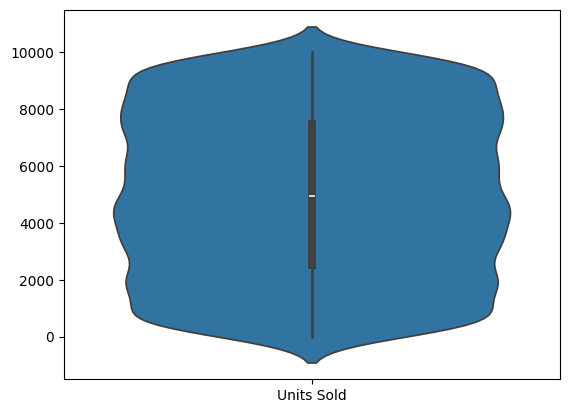

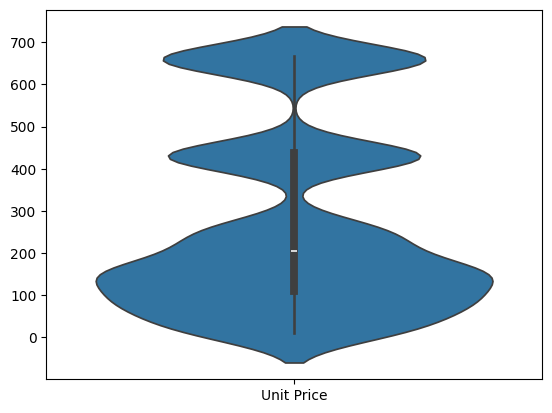

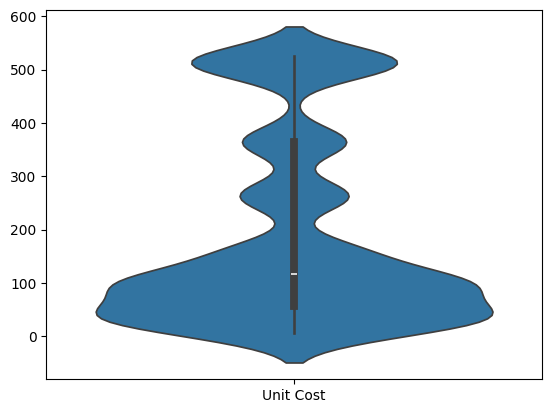

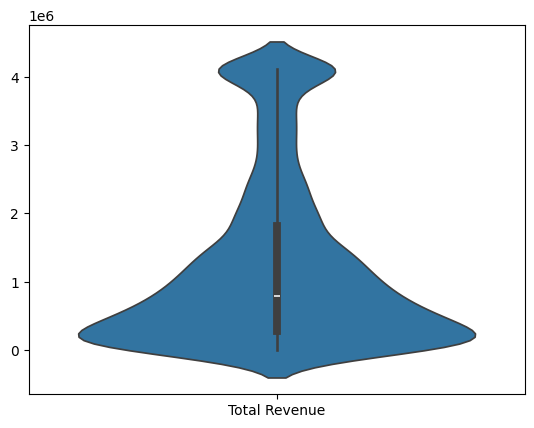

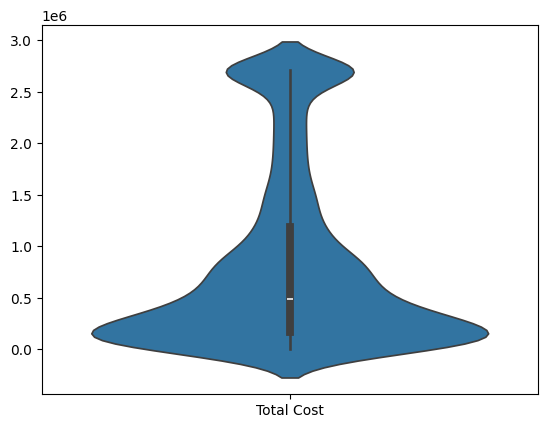

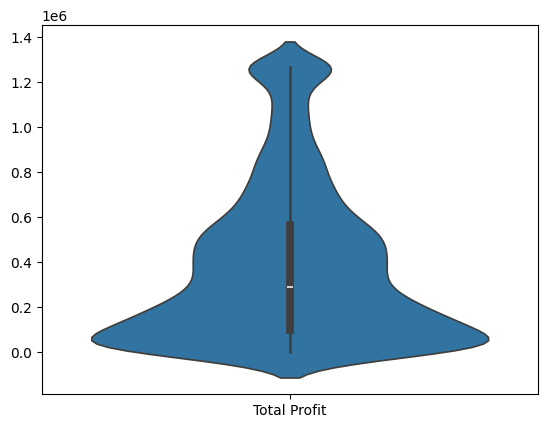

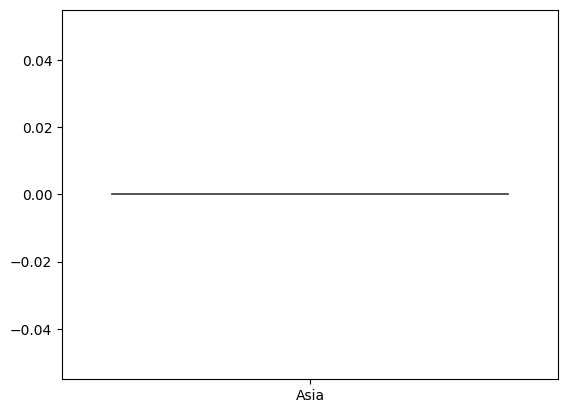

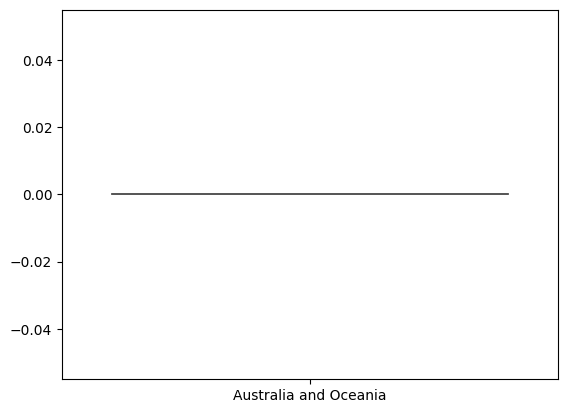

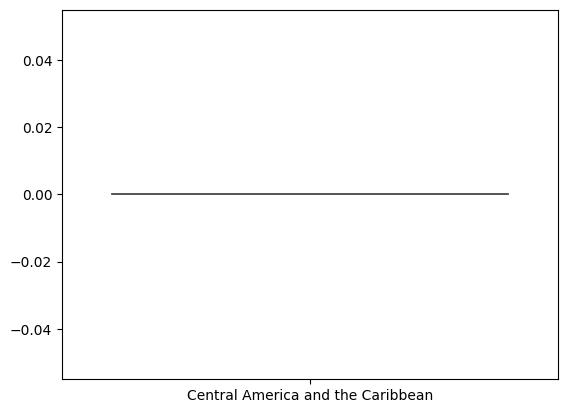

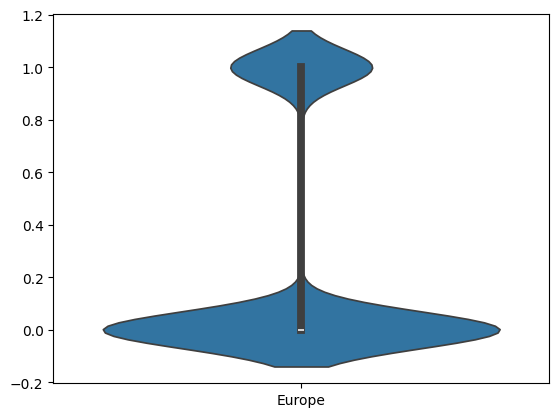

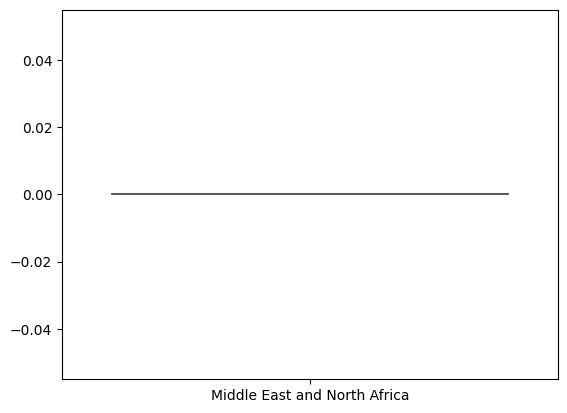

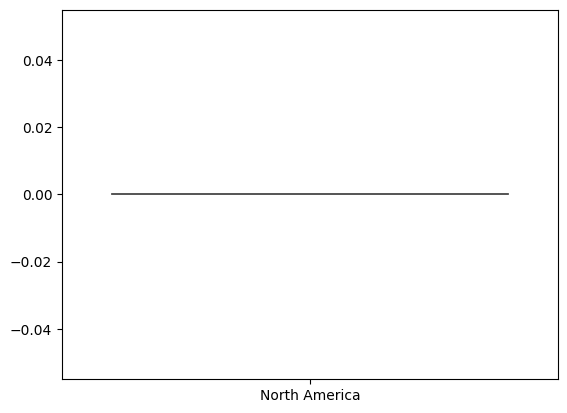

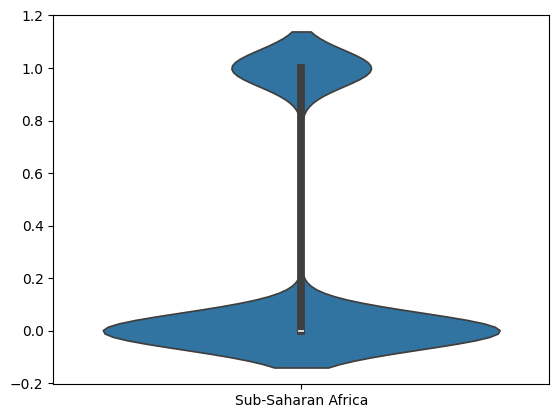

In [67]:
for column in num_column:
  sns.violinplot(data=df[[column]])
  plt.show()

In [68]:
df1.select_dtypes(include=np.number).skew()

Order ID                             0.007436
Units Sold                          -0.001397
Unit Price                           0.733317
Unit Cost                            0.888406
Total Revenue                        1.135619
Total Cost                           1.129598
Total Profit                         1.014479
Asia                                 0.000000
Australia and Oceania                0.000000
Central America and the Caribbean    0.000000
Europe                               1.075035
Middle East and North Africa         0.000000
North America                        0.000000
Sub-Saharan Africa                   1.092693
dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [73]:
x=df.drop('Total Profit',axis=1)
y=df['Total Profit']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 20)
(2000, 20)
(8000,)
(2000,)


In [78]:
numerical_features = x_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])

In [79]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [80]:
print("\n Training models,")
models={'Linear Regression':LinearRegression(),
        'Decision Tree':DecisionTreeRegressor(),
        'Random Forest':RandomForestRegressor(random_state=42),
        'DT':DecisionTreeRegressor(),
        'Gradient Boosting':GradientBoostingRegressor(random_state=42),'SVR':SVR()}



 Training models,


In [81]:
resuilt={}
for name,model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  r2=r2_score(y_test,y_pred)


In [84]:
results = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}
print(results)

{'MAE': 278523.95115776715, 'MSE': 133890181229.89668, 'RMSE': np.float64(365910.07259967126), 'R2': -0.052120792039537234}


In [95]:
print("\nModel Performance:")
for model_name, metric_value in results.items():
  print(f"\n{model_name}: {metric_value:.4f}")


Model Performance:

MAE: 278523.9512

MSE: 133890181229.8967

RMSE: 365910.0726

R2: -0.0521
